## Project -1

In [3]:
#install Yahoo Finance
!pip install -q yfinance

In [58]:
#importing Python Libraries
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [201]:
Cognizant = yf.download("CTSH", start="2015-01-01", end="2021-12-31")

[*********************100%***********************]  1 of 1 completed


In [202]:
#Displaying the First 5 rows of Tesla Dataset
Cognizant.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02 00:00:00-05:00,52.889999,53.770000,52.000000,52.669998,49.282612,2370900
2015-01-05 00:00:00-05:00,53.970001,53.970001,52.070000,52.340000,48.973831,3017300
2015-01-06 00:00:00-05:00,52.110001,52.320000,50.709999,50.980000,47.701298,4183800
2015-01-07 00:00:00-05:00,51.209999,52.680000,51.209999,52.650002,49.263901,4411400
2015-01-08 00:00:00-05:00,52.840000,54.110001,52.599998,53.880001,50.414791,5570200


In [205]:
#Finding the datatypes of the dataset 
Cognizant.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2015-01-02 00:00:00-05:00 to 2021-12-30 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1762 non-null   float64
 1   High       1762 non-null   float64
 2   Low        1762 non-null   float64
 3   Close      1762 non-null   float64
 4   Adj Close  1762 non-null   float64
 5   Volume     1762 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.4 KB


In [206]:
#slicing the Data set
x=Cognizant.iloc[:,:5]

In [207]:
#Displaying the Dataset after slicing
x

,Open,High,Low,Close,Adj Close
Date,,,,,
2015-01-02 00:00:00-05:00,52.889999,53.770000,52.000000,52.669998,49.282612
2015-01-05 00:00:00-05:00,53.970001,53.970001,52.070000,52.340000,48.973831
2015-01-06 00:00:00-05:00,52.110001,52.320000,50.709999,50.980000,47.701298
2015-01-07 00:00:00-05:00,51.209999,52.680000,51.209999,52.650002,49.263901
2015-01-08 00:00:00-05:00,52.840000,54.110001,52.599998,53.880001,50.414791
...,...,...,...,...,...
2021-12-23 00:00:00-05:00,86.050003,86.970001,85.930000,86.290001,85.362885
2021-12-27 00:00:00-05:00,86.440002,88.180000,86.360001,88.089996,87.143539
2021-12-28 00:00:00-05:00,88.269997,88.889999,87.989998,88.730003,87.776672


In [208]:
# Creating the target variable y
y = np.where(x['Adj Close'].shift(-1) > x['Adj Close'], 1, -1)
# Conveting the array into a dataset
y=pd.DataFrame(y)

In [209]:
y

,0
0,-1
1,-1
2,1
3,1
4,1
...,...
1757,1
1758,1
1759,1
1760,-1


In [210]:
#splitting the dataset into test and train datasets in 80:20 ratio
X_train, X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.2)

In [211]:
#displaying the count of distinct values in the target variable.
print(f"Y_train: \n{Y_train.value_counts()}")
print(f"Y_test: \n{Y_test.value_counts()}")

Y_train: 
 1    715
-1    694
dtype: int64
Y_test: 
 1    193
-1    160
dtype: int64


## Strategy-1

In [212]:
# Importing K-Nearest Neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
#Assigning the variable to the classifier 
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
# Predict on dataset which model has not seen before
Y_pred=knn.predict(X_test)
# print Classification report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          -1       0.47      0.51      0.49       160
           1       0.57      0.53      0.55       193

    accuracy                           0.52       353
   macro avg       0.52      0.52      0.52       353
weighted avg       0.52      0.52      0.52       353



In [213]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#Assigning the variable to the classifier 
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
# Predict on dataset which model has not seen before
Y_pred=rf.predict(X_test)
# print Classification report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          -1       0.46      0.51      0.49       160
           1       0.56      0.51      0.53       193

    accuracy                           0.51       353
   macro avg       0.51      0.51      0.51       353
weighted avg       0.51      0.51      0.51       353



In [214]:
# Importing Gradient Boosting  Classifier
from sklearn.ensemble import GradientBoostingClassifier
#Assigning the variable to the classifier
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)
# Predict on dataset which model has not seen before
Y_pred=gb.predict(X_test)
# print Classification report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          -1       0.38      0.32      0.35       160
           1       0.50      0.58      0.54       193

    accuracy                           0.46       353
   macro avg       0.44      0.45      0.44       353
weighted avg       0.45      0.46      0.45       353



In [215]:
# Importing Support Vector Machines Classifier
from sklearn.svm import SVC
#Assigning the variable to the classifier
svc = SVC()
svc.fit(X_train,Y_train)
# Predict on dataset which model has not seen before
Y_pred=svc.predict(X_test)
# print Classification report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          -1       0.47      0.48      0.47       160
           1       0.56      0.54      0.55       193

    accuracy                           0.52       353
   macro avg       0.51      0.51      0.51       353
weighted avg       0.52      0.52      0.52       353



In [216]:
# Importing XG Boost Classifier
from xgboost import XGBClassifier
#Assigning the variable to the classifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
# Predict on dataset which model has not seen before
Y_pred=xgb.predict(X_test)
# print Classification report
print(classification_report(Y_test,Y_pred))

[18:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

          -1       0.46      0.49      0.47       160
           1       0.55      0.51      0.53       193

    accuracy                           0.50       353
   macro avg       0.50      0.50      0.50       353
weighted avg       0.51      0.50      0.51       353



## Strategy-2

In [217]:
#slicing the dataset
X_df=x.iloc[:,4:5]

In [218]:
# create 50 days simple moving average column
X_df['50_MA'] = X_df['Adj Close'].rolling(window = 50, min_periods = 1).mean()
# create 200 days simple moving average column
X_df['200_MA'] = X_df['Adj Close'].rolling(window = 200, min_periods = 1).mean()
# display first few rows
X_df.tail()

,Adj Close,50_MA,200_MA
Date,,,
2021-12-23 00:00:00-05:00,85.362885,79.570581,74.817156
2021-12-27 00:00:00-05:00,87.143539,79.785636,74.871835
2021-12-28 00:00:00-05:00,87.776672,79.986130,74.922330
2021-12-29 00:00:00-05:00,88.627426,80.202456,74.983008
2021-12-30 00:00:00-05:00,87.984421,80.388168,75.040617


In [219]:
# Displaying the datatype
X_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2015-01-02 00:00:00-05:00 to 2021-12-30 00:00:00-05:00
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1762 non-null   float64
 1   50_MA      1762 non-null   float64
 2   200_MA     1762 non-null   float64
dtypes: float64(3)
memory usage: 55.1 KB


## Applying classifier models

In [220]:
y1=np.where(X_df['50_MA']> X_df['200_MA'], 1, -1)

In [221]:
y1=pd.DataFrame(y1)
y1

,0
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
1757,1
1758,1
1759,1
1760,1


In [222]:
X_train, X_test,Y_train,Y_test = train_test_split(X_df, y1,test_size=0.2)

In [223]:
# Importing K-Nearest Neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
#Assigning the variable to the classifier 
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
# Predict on dataset which model has not seen before
Y_pred=knn.predict(X_test)
# print Classification report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          -1       0.99      0.98      0.99       181
           1       0.98      0.99      0.99       172

    accuracy                           0.99       353
   macro avg       0.99      0.99      0.99       353
weighted avg       0.99      0.99      0.99       353



In [224]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#Assigning the variable to the classifier 
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
# Predict on dataset which model has not seen before
Y_pred=rf.predict(X_test)
# print Classification report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          -1       0.98      0.99      0.99       181
           1       0.99      0.98      0.99       172

    accuracy                           0.99       353
   macro avg       0.99      0.99      0.99       353
weighted avg       0.99      0.99      0.99       353



In [225]:
# Importing Gradient Boosting  Classifier
from sklearn.ensemble import GradientBoostingClassifier
#Assigning the variable to the classifier
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)
# Predict on dataset which model has not seen before
Y_pred=gb.predict(X_test)
# print Classification report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          -1       0.99      0.97      0.98       181
           1       0.97      0.99      0.98       172

    accuracy                           0.98       353
   macro avg       0.98      0.98      0.98       353
weighted avg       0.98      0.98      0.98       353



In [226]:
# Importing Support Vector Machines Classifier
from sklearn.svm import SVC
#Assigning the variable to the classifier
svc = SVC()
svc.fit(X_train,Y_train)
# Predict on dataset which model has not seen before
Y_pred=svc.predict(X_test)
# print Classification report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          -1       0.94      0.98      0.96       181
           1       0.98      0.94      0.96       172

    accuracy                           0.96       353
   macro avg       0.96      0.96      0.96       353
weighted avg       0.96      0.96      0.96       353



In [227]:
# Importing XG Boost Classifier
from xgboost import XGBClassifier
#Assigning the variable to the classifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
# Predict on dataset which model has not seen before
Y_pred=xgb.predict(X_test)
# print Classification report
print(classification_report(Y_test,Y_pred))

[18:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

          -1       0.98      0.97      0.98       181
           1       0.97      0.98      0.98       172

    accuracy                           0.98       353
   macro avg       0.98      0.98      0.98       353
weighted avg       0.98      0.98      0.98       353



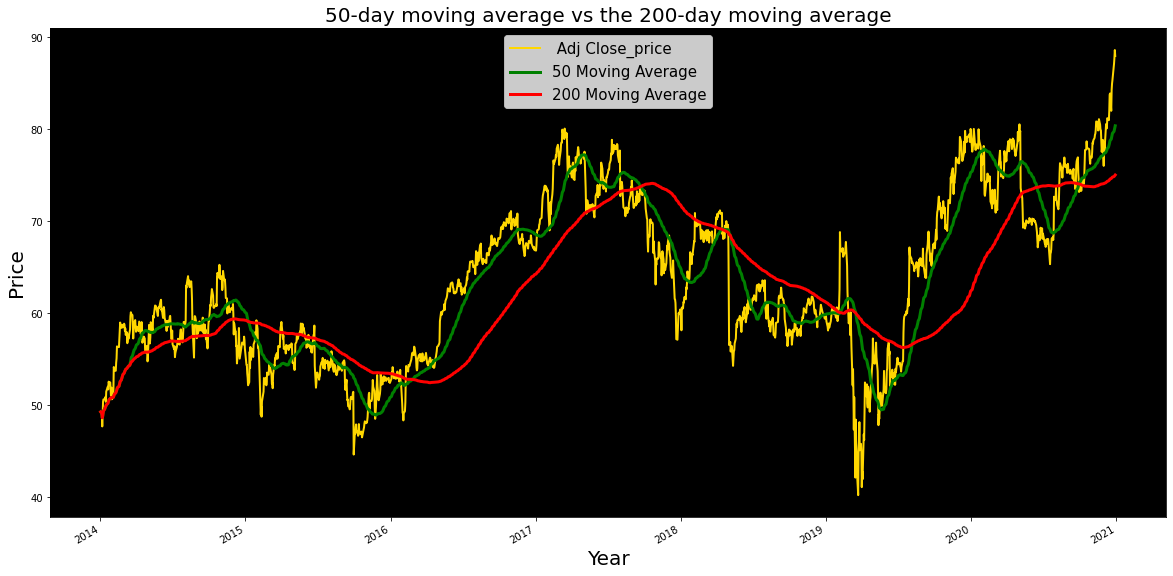

In [229]:
import matplotlib.pyplot as plt
x_plt=plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
ax = plt.axes()
ax.set_facecolor("Black")
X_df['Adj Close'].plot(color='Gold',linewidth=2,label=' Adj Close_price')
X_df['50_MA'].plot(color='Green',linewidth=3,label="50 Moving Average")
X_df['200_MA'].plot(color='Red',linewidth=3,label='200 Moving Average')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.title('50-day moving average vs the 200-day moving average',fontsize=20)
plt.legend(loc='upper center',fontsize=15)